## Monte Carlo - Forecasting Stock Prices - Part II 

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [11]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

******

Use “.values” to transform the *drift* and the *stdev* objects into arrays. 

In [12]:
drift=drift.values
stdev=stdev.values




array([0.01949704])

Forecast future stock prices for every trading day a year ahead. So, assign 250 to “t_intervals”. <br />
Let’s examine 10 possible outcomes. Bind “iterations” to the value of 10.

In [16]:
t_intervals=250
iterations=10

Use the formula we have provided and calculate daily returns.

$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 
<br>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [20]:
z=norm.ppf(np.random.rand(t_intervals, iterations))
z.shape

(250, 10)

In [22]:
daily_returns=np.exp(drift+(stdev*z))
daily_returns

array([[0.98226647, 1.00579956, 0.98636103, ..., 1.02077612, 1.00320872,
        1.00303087],
       [1.0032518 , 1.02704445, 0.99729311, ..., 0.9969321 , 1.00671952,
        1.00110542],
       [1.01853572, 1.00100004, 0.97644472, ..., 0.9700637 , 0.98975758,
        1.00814359],
       ...,
       [0.96748399, 0.99919782, 1.00539371, ..., 0.9505602 , 1.0166152 ,
        1.00165612],
       [0.98890593, 1.03426523, 1.00490395, ..., 1.01479691, 1.00172277,
        0.9963809 ],
       [0.98701899, 0.98544444, 0.96275749, ..., 0.97288718, 1.02896858,
        1.01363707]])

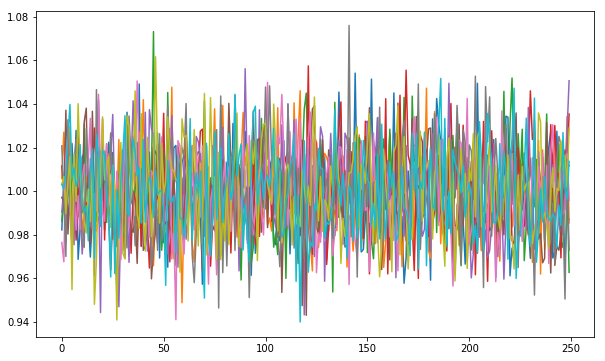

In [29]:
plt.figure(figsize=(10,6))
plt.plot(daily_returns)